##### Multiple Linear Regression

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [19]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


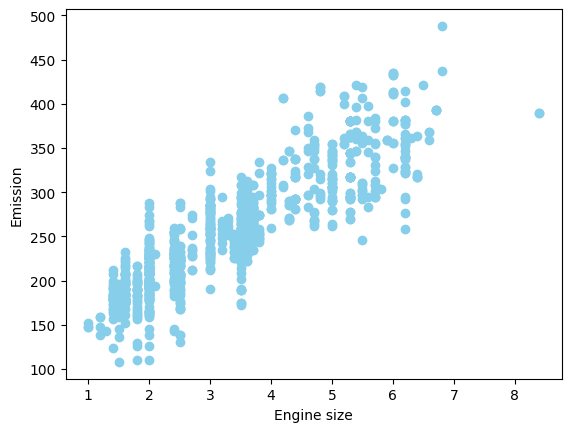

In [21]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='skyblue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

##### Multiple Regression Model

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.2094395   7.15561381  9.5208118 ]]


In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
# 데이터셋을 CSV 파일로부터 불러옵니다.
df = pd.read_csv('FuelConsumption.csv')  # 'your_dataset.csv'를 실제 파일명으로 변경하세요.

# 필요한 컬럼만 선택합니다.
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]

# 훈련과 테스트 데이터로 분할합니다.
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# 입력과 출력 변수 설정
x_train = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

# 선형 회귀 모델 초기화 및 학습
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# 회귀 계수 출력
print('Coefficients: ', regr.coef_)

Coefficients:  [[11.2094395   7.15561381  9.5208118 ]]


##### Prediction

In [30]:
# Ensure consistent use of numpy arrays

# 모델 학습
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x_train, y_train)

# 예측
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(x_test)

# 성능 평가
print("Mean Squared Error (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

Mean Squared Error (MSE): 512.86
Variance score: 0.88


##### Practice

In [32]:
# train 데이터프레임에 새로운 열 추가
train['FUELCONSUMPTION_CITY'] = np.random.normal(10, 2, train.shape[0])
train['FUELCONSUMPTION_HWY'] = np.random.normal(7, 1, train.shape[0])

# test 데이터프레임에 새로운 열 추가
test['FUELCONSUMPTION_CITY'] = np.random.normal(10, 2, test.shape[0])
test['FUELCONSUMPTION_HWY'] = np.random.normal(7, 1, test.shape[0])

In [33]:
print("Train columns after adding new features:", train.columns)
print("Test columns after adding new features:", test.columns)

Train columns after adding new features: Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'],
      dtype='object')
Test columns after adding new features: Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'],
      dtype='object')


In [34]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[28.89327687  8.40808956  0.24694342  1.26356219]]
Residual sum of squares: 936.75
Variance score: 0.77


C:\Users\kimey\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
